In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [115]:
((1.38e-23*(1200+273))*50e9)*2000

2.0327400000000003e-06

In [7]:
from kid_readout.utils.readoutnc import ReadoutNetCDF
from kid_readout.analysis.resonator import fit_best_resonator

In [4]:
rnc = ReadoutNetCDF('/data/readout/2015-10-20_152744_mmw_frequency_sweep_hittite_level_-1.000_dBm.nc')

In [5]:
sweep = rnc.sweeps[0]

In [6]:
fr,s21,err = sweep.select_by_index(0)

In [8]:
res = fit_best_resonator(fr,s21,errors=err)

In [18]:
model = res.model(x=np.linspace(fr.min(),fr.max(),1000))

In [13]:
tsg = rnc.timestreams[0]

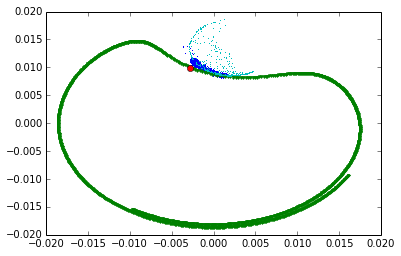

In [31]:
plot(ts.real,ts.imag,',')
plot(model.real,model.imag,'.-')
plot(mmw.s0.real,mmw.s0.imag,'o')
blah = plot(mmw.raw_high.real,mmw.raw_high.imag,',')

In [109]:
import kid_readout.analysis.process_mmw_response
reload(kid_readout.analysis.process_mmw_response)

<module 'kid_readout.analysis.process_mmw_response' from '/home/gjones/kid_readout/kid_readout/analysis/process_mmw_response.py'>

In [110]:
mmw = kid_readout.analysis.process_mmw_response.MmwResponse('/data/readout/2015-10-20_152744_mmw_frequency_sweep_hittite_level_-1.000_dBm.nc',0,data_is_aligned=False)

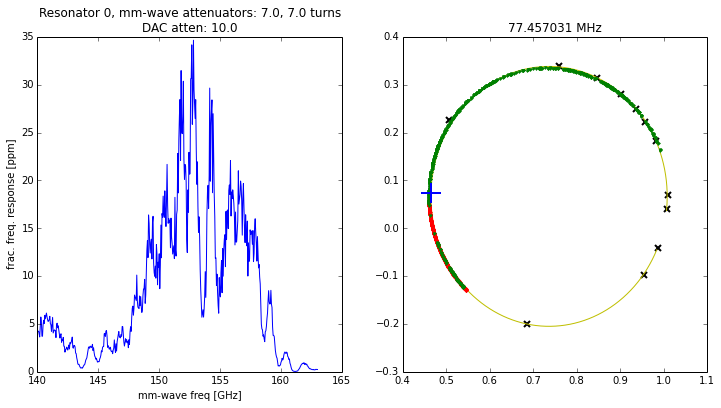

In [111]:
blah = mmw.plot()

In [23]:
mmw.measurement_freq

77.45703125

In [25]:
d = tsg.data[::16]

In [26]:
d.shape

(500, 32768)

In [28]:
mmw.aligned_data.shape

(500, 128)

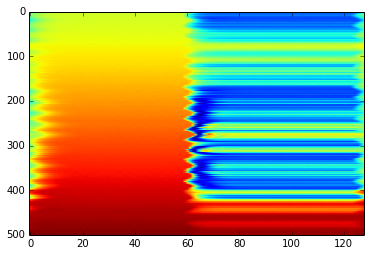

In [112]:
imshow(mmw.aligned_data.real,aspect='auto')

In [44]:
x = kid_readout.analysis.resonator.normalized_s21_to_detuning(res.normalize(mmw.measurement_freq,d),res)

In [45]:
x.shape

(500, 32768)

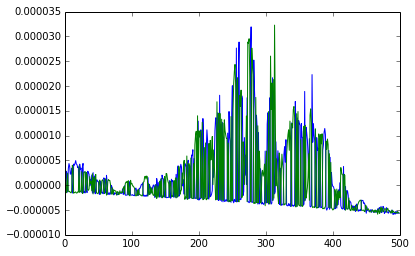

In [60]:
plot(x[:,32])
plot(x[:,96])

In [49]:
s = np.zeros((32768))
c = np.zeros((32768))
s[np.mod(np.arange(32768),128)<64] = -1
s[np.mod(np.arange(32768),128)>=64] = 1
c[np.mod(np.arange(32768)+32,128)<64] = -1
c[np.mod(np.arange(32768)+32,128)>=64] = 1


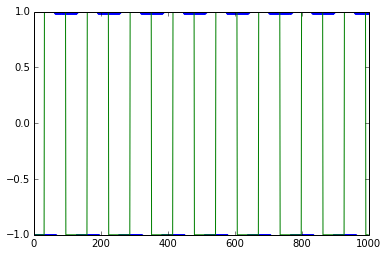

In [50]:
plot(s[:1000],'.')
plot(c[:1000])

In [83]:
xf = x.reshape((500,-1,128)).mean(1)

In [51]:
ds = x*s
dc = x*c

In [52]:
dsf = ds.reshape((500,-1,128)).mean(1)
dcf = dc.reshape((500,-1,128)).mean(1)

In [65]:
dsa = ds.mean(1)
dca = dc.mean(1)

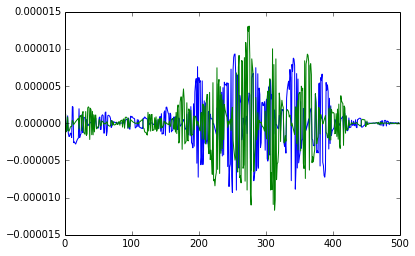

In [66]:
plot(dsa)
plot(dca)

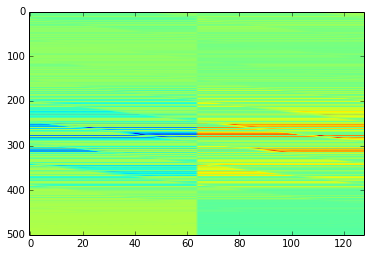

In [57]:
imshow(dsf,aspect='auto')

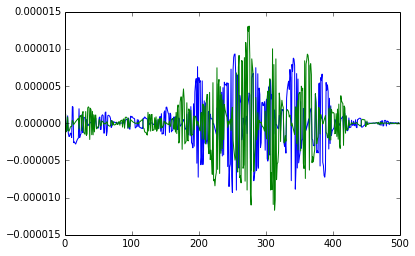

In [54]:
plot(dsf.mean(1))
plot(dcf.mean(1))

In [67]:
dd = dsa+1j*dca

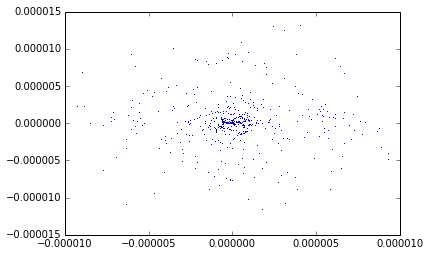

In [68]:
blah = plot(dd.real,dd.imag,',')

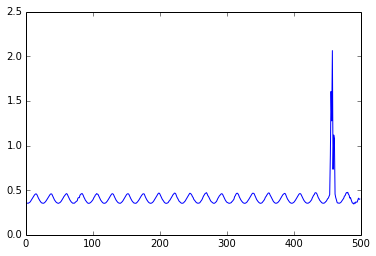

In [100]:
plot(np.abs(dd)/np.abs(mmw.mmw_frac_response))
#ylim(3,7)

In [71]:
zbd = tsg.zbd_voltage[::16]

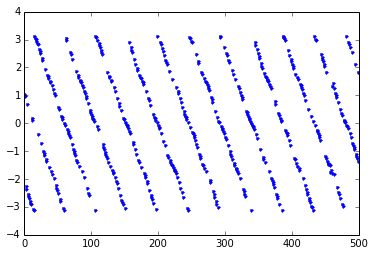

In [77]:
plot(np.angle(dd),'.')

In [80]:
shift = np.round((np.angle(dd)+np.pi)*128*0.5/np.pi).astype('int')

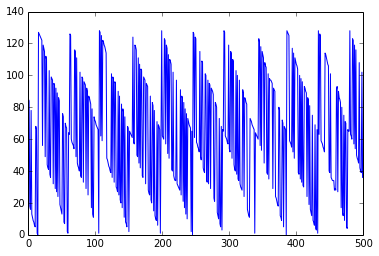

In [116]:
plot(shift)

In [84]:
xaligned = np.zeros_like(xf)

In [85]:
for k in range(500):
    xaligned[k,:] = np.roll(xf[k,:],shift[k])

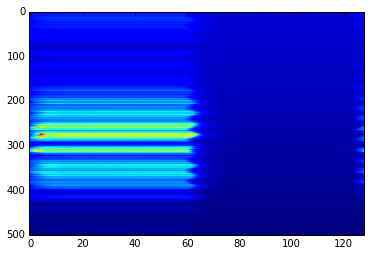

In [87]:
imshow(xaligned,aspect='auto')

(250, 300)

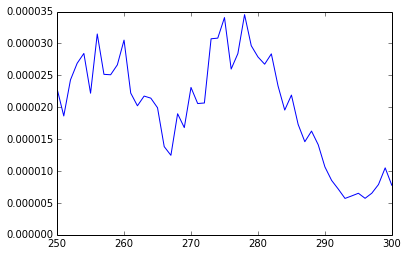

In [118]:
plot(xaligned[:,32]-xaligned[:,96])
xlim(250,300)

In [82]:
shift.shape

(500,)

In [ ]:
aligned  

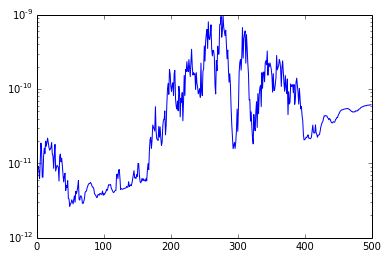

In [56]:
semilogy(np.mean(ds**2+dc**2,axis=1))